In [ ]:
"""
Practice on network analysis

Follow Pride & Prejudice example
characters  >> appear in chapters together [relationship += 1]

topic_words >> appear in speeches together?


"""

In [44]:
import re, itertools
import networkx as nx

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
topic_df = pd.read_pickle('../dump/topic_df')
speech_df = pd.read_pickle('../dump/speech_clean_lemma')

In [46]:
topic_df

0         1      2           3        4       5           6  \
Topic #01  parent      year  dream      person   family  advice      moment   
Topic #02  parent     sense   idea  generation     word   place        year   
Topic #03   women  question  state   education     year  parent  university   
Topic #04     man     women  place         men  success    word      course   

                 7           8          9  
Topic #01  friends       place       home  
Topic #02  country     friends  president  
Topic #03   course     company      dream  
Topic #04   career  university    country

In [47]:
mydict={'place': [],
 'advice': [],
 'home': [],
 'education': [],
 'company': [],
 'women': [],
 'career': [],
 'person': [],
 'year': [],}

In [48]:
mydict

{'place': [],
 'advice': [],
 'home': [],
 'education': [],
 'company': [],
 'women': [],
 'career': [],
 'person': [],
 'year': []}

In [49]:
mydict['place'].append(0)

In [50]:
mydict

{'place': [0],
 'advice': [],
 'home': [],
 'education': [],
 'company': [],
 'women': [],
 'career': [],
 'person': [],
 'year': []}

In [51]:
topic_word_list=[]
for i in range(len(topic_df)):
    topic_word_list.append(topic_df.iloc[i].values.tolist())
# topic_word_list

In [52]:
# topic words (=characters)
words = list(set([word for topic in topic_df.values.tolist() for word in topic ]))
# words.remove('men')
# words
len(words)

27

In [53]:
# transcripts list (=chapters)
transcripts = speech_df.transcript.tolist()

In [54]:
# prepare for node attribute (proper)
word_topic_dict = {word: [] for word in words}
for word in words:
    for index, topic_word in enumerate(topic_word_list):
        if word in topic_word:
            word_topic_dict[word].append(index)
word_topic_dict

{'women': [2, 3],
 'course': [2, 3],
 'moment': [0],
 'parent': [0, 1, 2],
 'year': [0, 1, 2],
 'man': [3],
 'success': [3],
 'president': [1],
 'dream': [0, 2],
 'sense': [1],
 'word': [1, 3],
 'state': [2],
 'person': [0],
 'education': [2],
 'advice': [0],
 'company': [2],
 'idea': [1],
 'family': [0],
 'question': [2],
 'men': [3],
 'university': [2, 3],
 'generation': [1],
 'friends': [0, 1],
 'home': [0],
 'career': [3],
 'place': [0, 1, 3],
 'country': [1, 3]}

In [55]:
# prepare for node attribute (sneaky)
word_topic_dict = {word: 0 for word in words}
for word in words:
    for index, topic_word in enumerate(topic_word_list):
        if word in topic_word:
            word_topic_dict[word] = index
word_topic_dict

{'women': 3,
 'course': 3,
 'moment': 0,
 'parent': 2,
 'year': 2,
 'man': 3,
 'success': 3,
 'president': 1,
 'dream': 2,
 'sense': 1,
 'word': 3,
 'state': 2,
 'person': 0,
 'education': 2,
 'advice': 0,
 'company': 2,
 'idea': 1,
 'family': 0,
 'question': 2,
 'men': 3,
 'university': 3,
 'generation': 1,
 'friends': 1,
 'home': 0,
 'career': 3,
 'place': 3,
 'country': 3}

In [56]:
transcripts[0].count('i')

791

In [57]:
word_size = list(word_size_dict.values())

In [58]:
# Save edge information

word_assoc_dict = {}

for index, transcript in enumerate(transcripts):
#     print('transcript',index)
    appears = []
    for word in words:
        if word in transcript:
            appears.append(word)
#     print(appears)        
    relationships = itertools.combinations(sorted(appears),2) 
    for relationship in relationships:
        if relationship in word_assoc_dict:
            word_assoc_dict[relationship] += 1
        else:
            word_assoc_dict[relationship] = 1

word_assoc_dict

{('course', 'friends'): 190,
 ('course', 'generation'): 131,
 ('course', 'home'): 191,
 ('course', 'idea'): 187,
 ('course', 'man'): 265,
 ('course', 'men'): 265,
 ('course', 'moment'): 182,
 ('course', 'parent'): 205,
 ('course', 'person'): 223,
 ('course', 'place'): 227,
 ('course', 'question'): 163,
 ('course', 'sense'): 145,
 ('course', 'word'): 183,
 ('course', 'year'): 259,
 ('friends', 'generation'): 124,
 ('friends', 'home'): 217,
 ('friends', 'idea'): 200,
 ('friends', 'man'): 300,
 ('friends', 'men'): 298,
 ('friends', 'moment'): 209,
 ('friends', 'parent'): 247,
 ('friends', 'person'): 255,
 ('friends', 'place'): 238,
 ('friends', 'question'): 179,
 ('friends', 'sense'): 152,
 ('friends', 'word'): 200,
 ('friends', 'year'): 292,
 ('generation', 'home'): 122,
 ('generation', 'idea'): 123,
 ('generation', 'man'): 177,
 ('generation', 'men'): 177,
 ('generation', 'moment'): 120,
 ('generation', 'parent'): 138,
 ('generation', 'person'): 147,
 ('generation', 'place'): 144,
 ('ge

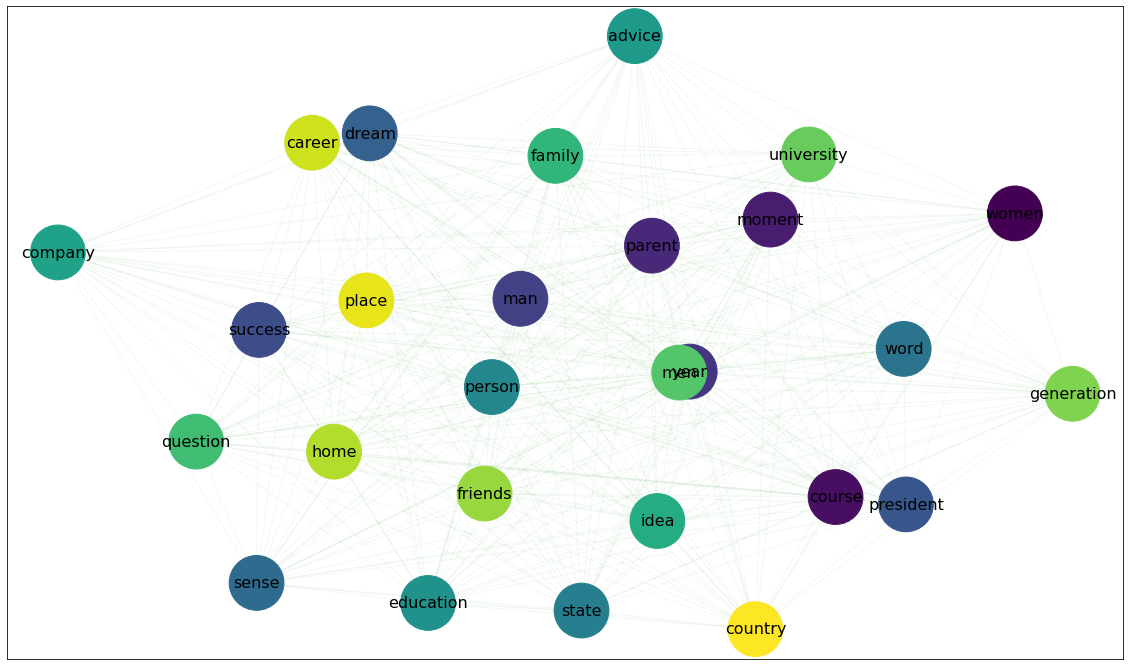

In [64]:
G = nx.Graph()

for word in words:
    G.add_node(word)

for edge, weight in word_assoc_dict.items():
    G.add_edge(edge[0], edge[1], weight=weight)

# print(G.edges().data())

plt.rcParams['figure.figsize'] = [20, 12]
pos = nx.spring_layout(G, iterations=200) # Color by degrree
# nx.draw(G, pos, with_labels=True, node_size=5000, node_color=range(27), cmap=plt.cm.Blues)


# nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=range(27))

# edges
nx.draw_networkx_edges(G, pos, edge_color="green", alpha=0.05)

# labels
nx.draw_networkx_labels(G, pos, font_size=16)

plt.show()

100%|██████████| 2000/2000 [00:00<00:00, 11808.34it/s]


BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.06  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


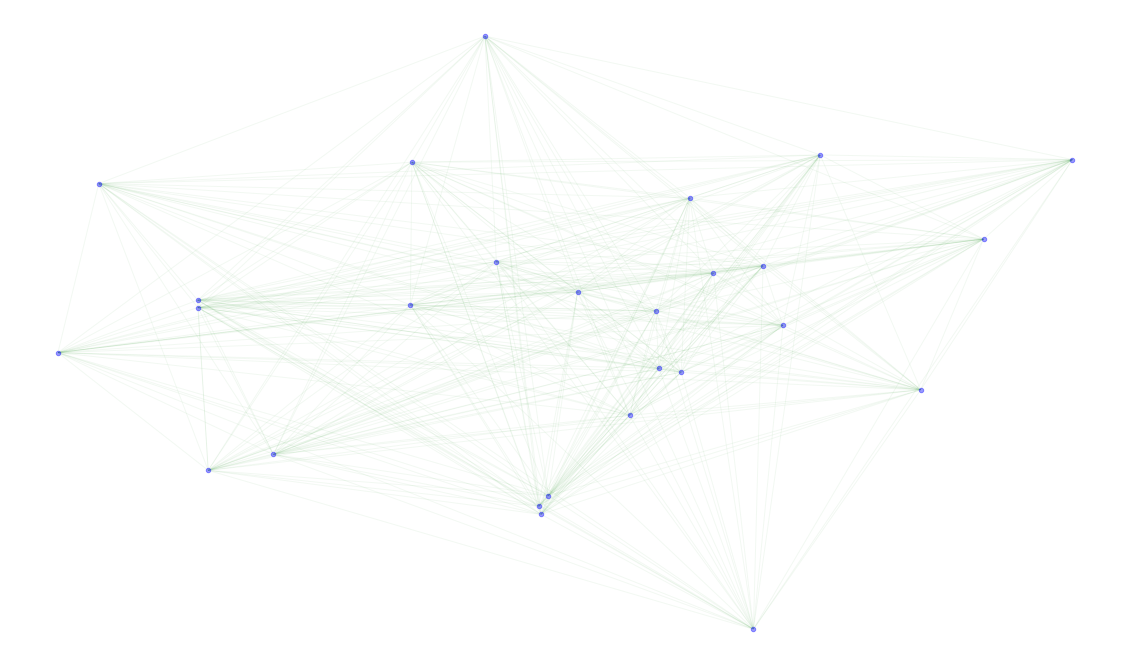

In [60]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)
nx.draw_networkx_nodes(G, positions, node_size=20, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

In [387]:
len(G.nodes()),G.degree

(28,
 DegreeView({'men': 27, 'place': 27, 'advice': 27, 'home': 27, 'education': 27, 'company': 27, 'women': 27, 'career': 27, 'person': 27, 'year': 27, 'country': 27, 'idea': 27, 'friends': 27, 'question': 27, 'moment': 27, 'success': 27, 'president': 27, 'man': 27, 'university': 27, 'word': 27, 'generation': 27, 'state': 27, 'parent': 27, 'dream': 27, 'family': 27, 'sense': 27, 'course': 27, 'abandon': 27}))

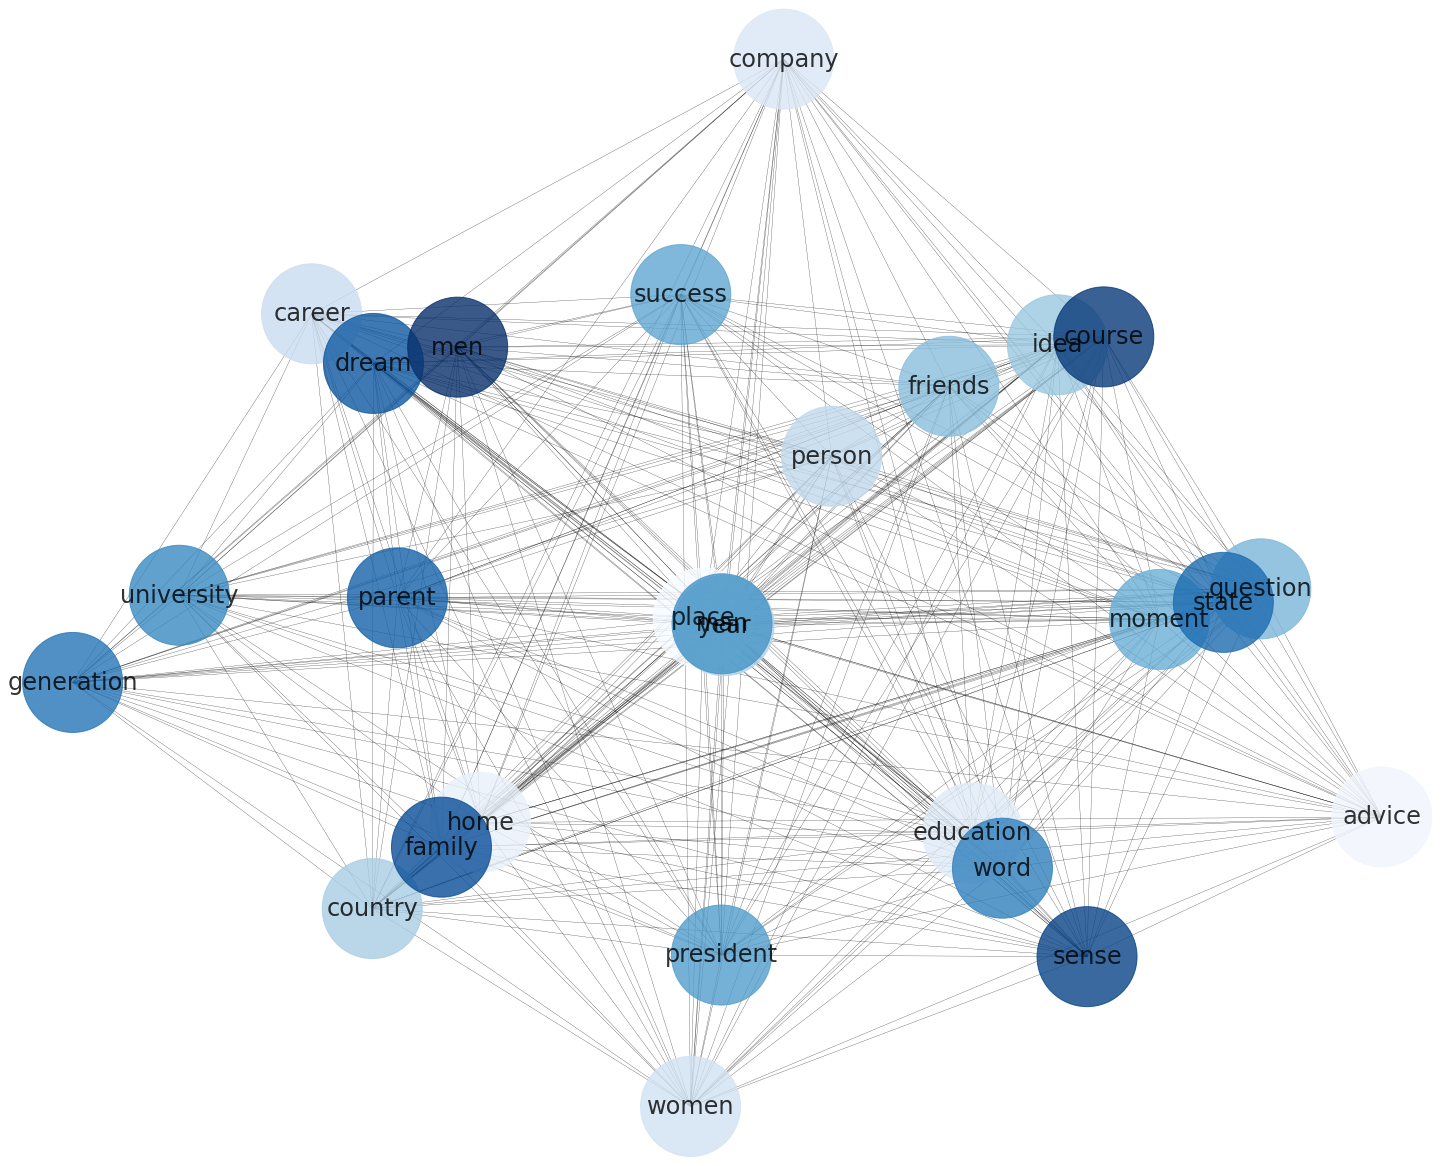

In [98]:
plt.rcParams['figure.figsize'] = [20, 16]
pos = nx.spring_layout(G, iterations=200) # Color by degrree
nx.draw(G, pos, with_labels=True, font_size=24,
        node_size=10000, node_color=range(27), cmap=plt.cm.Blues,
       width=.3, alpha=0.8)

In [293]:
word_topic_dict

{'men': 3,
 'place': 3,
 'advice': 0,
 'home': 0,
 'education': 2,
 'company': 2,
 'women': 3,
 'career': 3,
 'person': 0,
 'year': 2,
 'country': 3,
 'idea': 1,
 'friends': 1,
 'question': 2,
 'moment': 0,
 'success': 3,
 'president': 1,
 'man': 3,
 'university': 3,
 'word': 3,
 'generation': 1,
 'state': 2,
 'parent': 2,
 'dream': 2,
 'family': 0,
 'sense': 1,
 'course': 3}

In [294]:
for n, d in list(G.nodes(data=True)):
    G.nodes[n]['topic'] = word_topic_dict[n]

from itertools import count    
# get unique groups
# topics = set(nx.get_node_attributes(G,'topic').values())
topics = [0,1,2,3]
mapping = dict(zip(sorted(topics),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['topic']] for n in nodes]

In [295]:
G.nodes(data=True)

NodeDataView({'men': {'topic': 3}, 'place': {'topic': 3}, 'advice': {'topic': 0}, 'home': {'topic': 0}, 'education': {'topic': 2}, 'company': {'topic': 2}, 'women': {'topic': 3}, 'career': {'topic': 3}, 'person': {'topic': 0}, 'year': {'topic': 2}, 'country': {'topic': 3}, 'idea': {'topic': 1}, 'friends': {'topic': 1}, 'question': {'topic': 2}, 'moment': {'topic': 0}, 'success': {'topic': 3}, 'president': {'topic': 1}, 'man': {'topic': 3}, 'university': {'topic': 3}, 'word': {'topic': 3}, 'generation': {'topic': 1}, 'state': {'topic': 2}, 'parent': {'topic': 2}, 'dream': {'topic': 2}, 'family': {'topic': 0}, 'sense': {'topic': 1}, 'course': {'topic': 3}})

In [ ]:
# Testing starts

In [157]:
for n, d in list(G.nodes(data=True))[:5]:
    G.nodes[n]['topic'] = 'education'
for n, d in list(G.nodes(data=True))[5:]:
    G.nodes[n]['topic'] = 'women'

from itertools import count    
# get unique groups
# topics = set(nx.get_node_attributes(G,'topic').values())
topics = ['education','women']
mapping = dict(zip(sorted(topics),count()))
nodes = G.nodes()
colors = [mapping[G.nodes[n]['topic']] for n in nodes]

In [158]:
mapping

{'education': 0, 'women': 1}

In [159]:
(G.nodes[n]['topic'])

'women'

In [378]:
# colors

In [279]:
# color_map = []
# for node, d in G.nodes(data=True):
# #     print(d)
#     if d['topic'] == ['education']:
#         color_map.append('blue')
#     else:
#         color_map.append('red')
# color_map

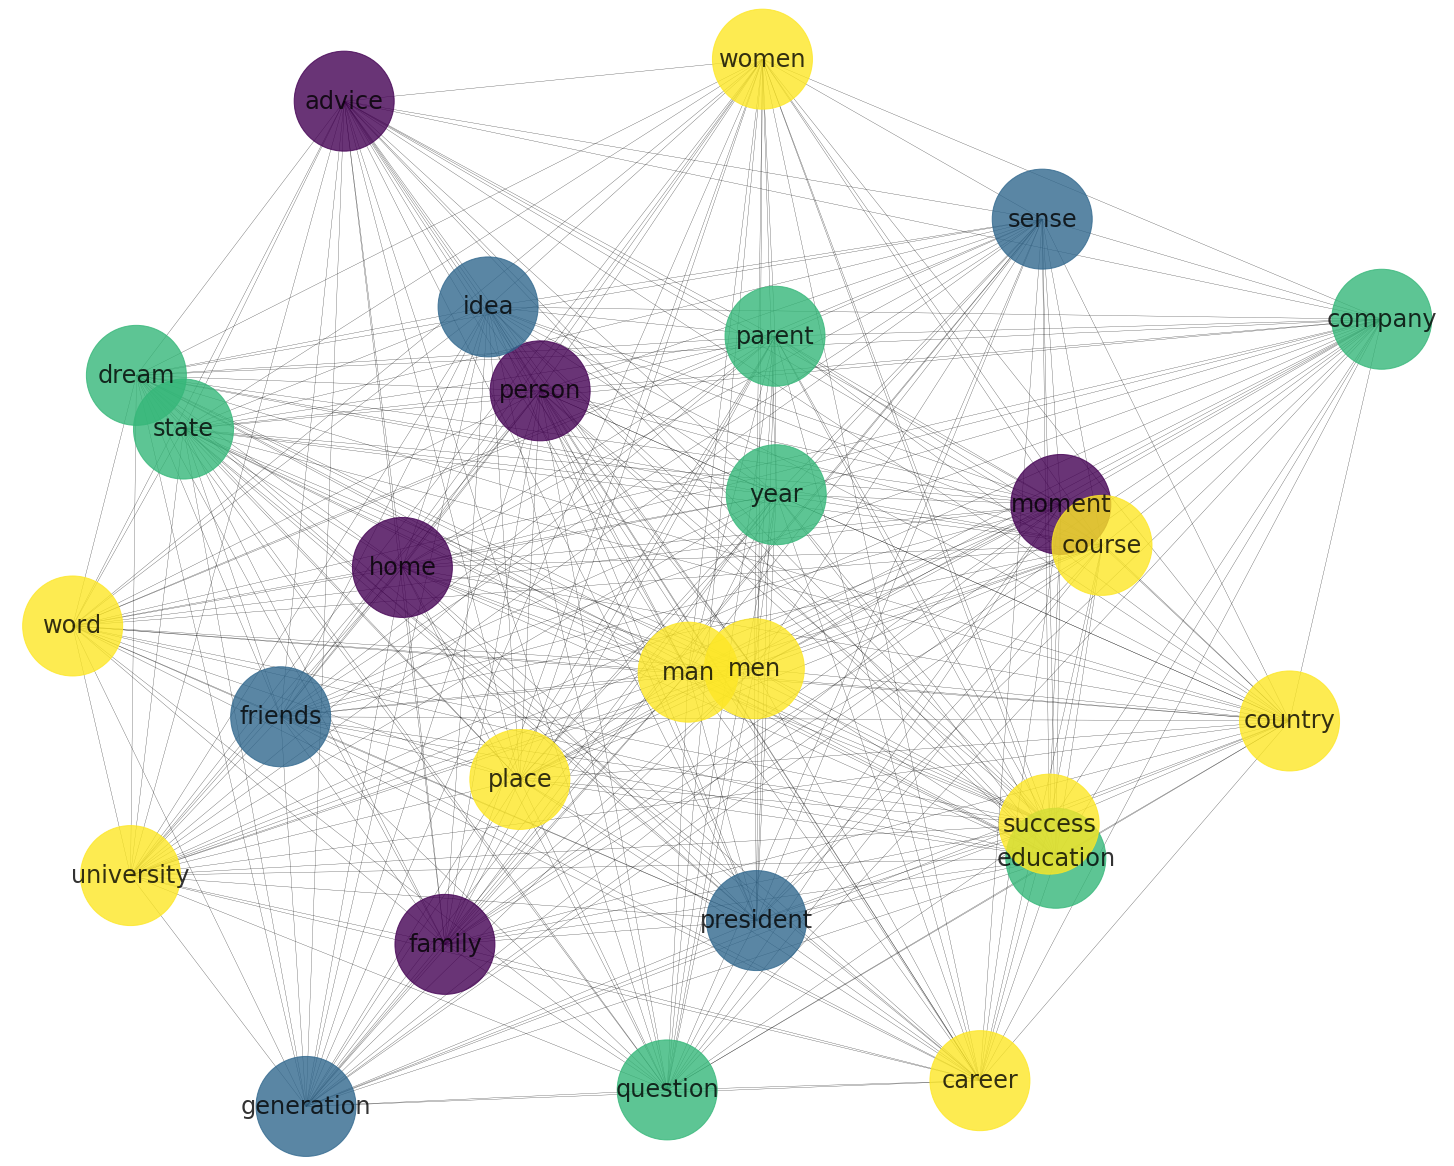

In [377]:
plt.rcParams['figure.figsize'] = [20, 16]
pos = nx.spring_layout(G, iterations=200) # Color by degrree
nx.draw(G, pos, with_labels=True, font_size=24,
        node_size=10000, node_color=colors,
       width=.3, alpha=0.8)

In [388]:
word_size_dict ={word:0 for word in words}

for transcript in transcripts:
    for word in words:
        word_size_dict[word] += transcript.count(word)

word_size_dict

{'men': 6574,
 'place': 946,
 'advice': 450,
 'home': 697,
 'education': 734,
 'company': 420,
 'women': 806,
 'career': 483,
 'person': 984,
 'year': 2887,
 'country': 602,
 'idea': 777,
 'friends': 724,
 'question': 689,
 'moment': 823,
 'success': 841,
 'president': 625,
 'man': 4725,
 'university': 621,
 'word': 642,
 'generation': 535,
 'state': 741,
 'parent': 1011,
 'dream': 824,
 'family': 623,
 'sense': 464,
 'course': 620}

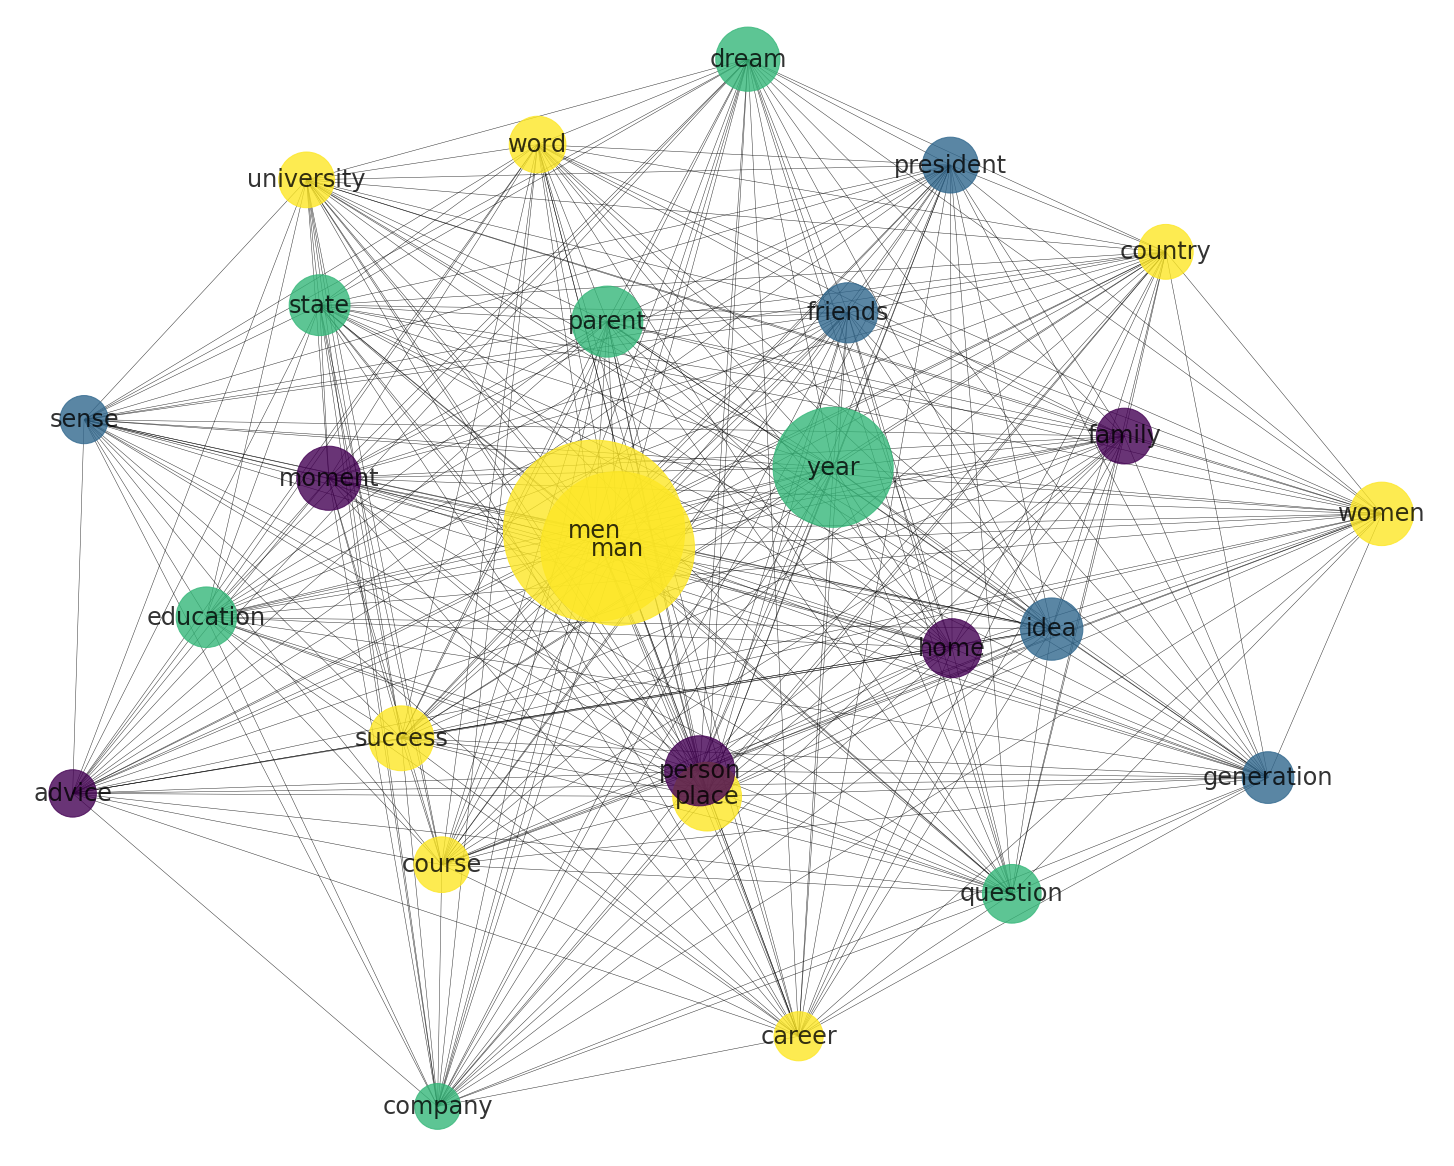

In [407]:
plt.rcParams['figure.figsize'] = [20, 16]

pos = nx.spring_layout(G, iterations=200, k=0.2, scale=0.5) # position of nodes

d = word_size_dict
nx.draw(G, pos, nodelist=d.keys(), node_size=[v*5 for v in d.values()], node_color=colors,        
       width=.5, alpha=0.8,
       with_labels=True, font_size=24)

# nx.draw(G, pos, with_labels=True, font_size=24,
#         node_size=10000, node_color=colors,
#        width=.3, alpha=0.8)

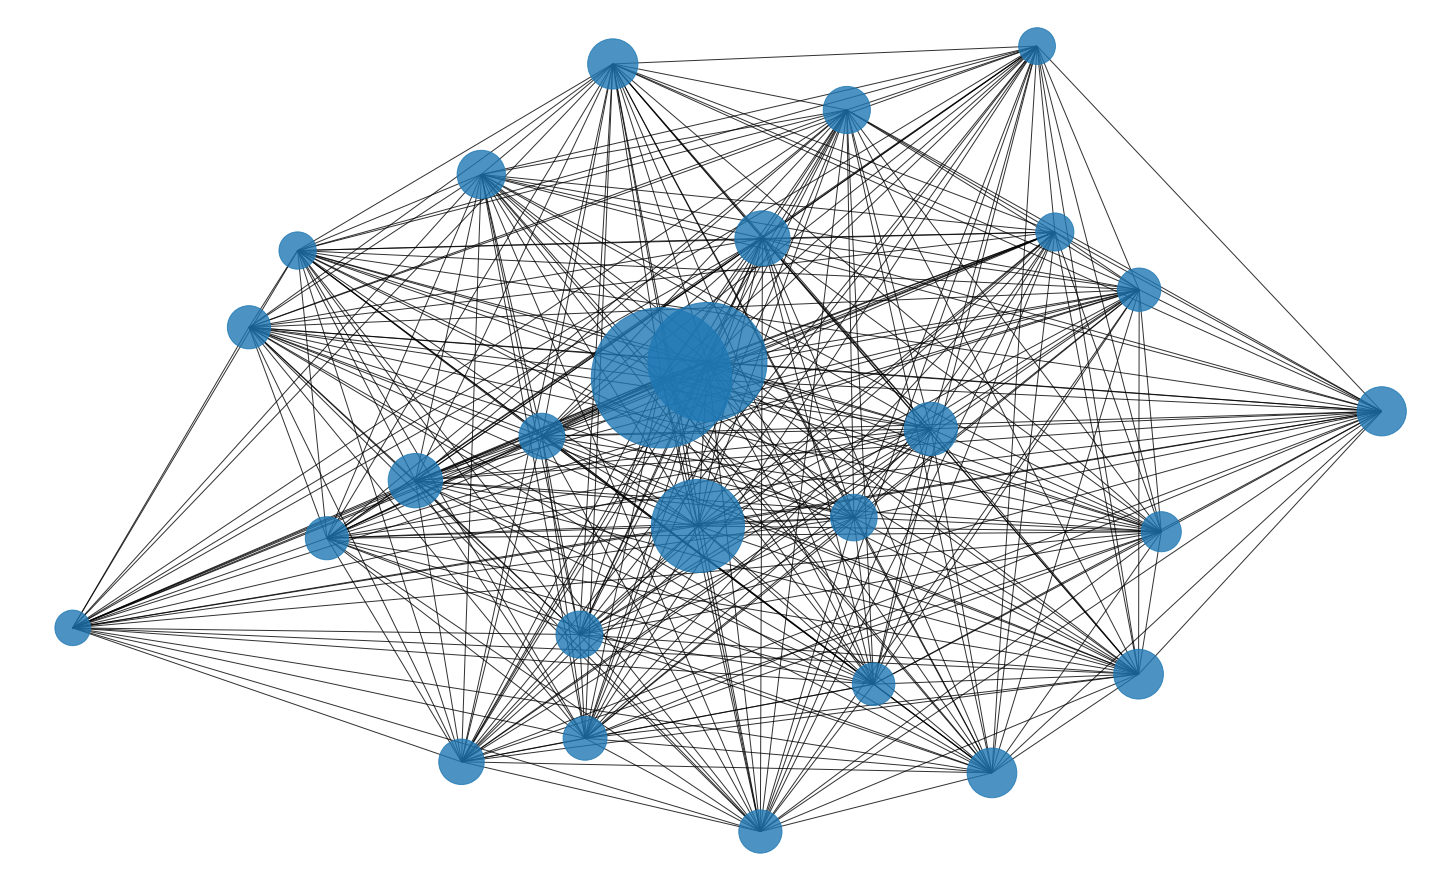

In [365]:
# nodes size
# d = dict(G.degree)
d = word_size_dict
nx.draw(G, nodelist=d.keys(), node_size=[v*3 for v in d.values()],alpha = 0.8)
plt.show()
# nx.draw_networkx_nodes(G, pos, node_size=3000, node_color=range(27))

In [360]:
dict(G.degree)

{'men': 26,
 'place': 26,
 'advice': 26,
 'home': 26,
 'education': 26,
 'company': 26,
 'women': 26,
 'career': 26,
 'person': 26,
 'year': 26,
 'country': 26,
 'idea': 26,
 'friends': 26,
 'question': 26,
 'moment': 26,
 'success': 26,
 'president': 26,
 'man': 26,
 'university': 26,
 'word': 26,
 'generation': 26,
 'state': 26,
 'parent': 26,
 'dream': 26,
 'family': 26,
 'sense': 26,
 'course': 26}

In [361]:
word_size_dict

{'men': 6574,
 'place': 946,
 'advice': 450,
 'home': 697,
 'education': 734,
 'company': 420,
 'women': 806,
 'career': 483,
 'person': 984,
 'year': 2887,
 'country': 602,
 'idea': 777,
 'friends': 724,
 'question': 689,
 'moment': 823,
 'success': 841,
 'president': 625,
 'man': 4725,
 'university': 621,
 'word': 642,
 'generation': 535,
 'state': 741,
 'parent': 1011,
 'dream': 824,
 'family': 623,
 'sense': 464,
 'course': 620}

In [1]:
# colors = [G[u][v]['topic'] for u,v in G.edges()]

## Apply networkx to Topic-words

In [5]:
import numpy
A=numpy.matrix([[1,1],[2,1]])
G=nx.from_numpy_matrix(A)

In [8]:
pd.DataFrame(A)

0  1
0  1  1
1  2  1

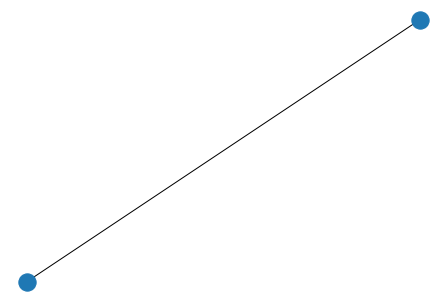

In [6]:
nx.draw(G)

In [9]:
df = pd.read_pickle('../dump/to_nx_topic_words')

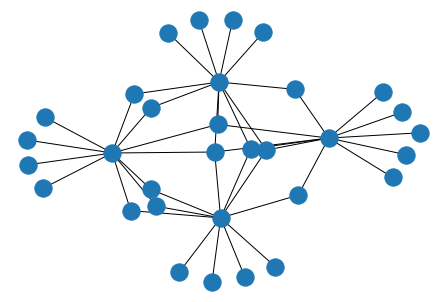

In [14]:
A=df.to_numpy()
G=nx.from_numpy_matrix(A)
nx.draw(G)

In [16]:
G.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}})

In [18]:
for n, d in list(G.nodes(data=True))[:4]:
    G.nodes[n]['type'] = 'topic'
for n, d in list(G.nodes(data=True))[4:]:
    G.nodes[n]['type'] = 'word'

In [19]:
G.nodes(data=True)

NodeDataView({0: {'type': 'topic'}, 1: {'type': 'topic'}, 2: {'type': 'topic'}, 3: {'type': 'topic'}, 4: {'type': 'word'}, 5: {'type': 'word'}, 6: {'type': 'word'}, 7: {'type': 'word'}, 8: {'type': 'word'}, 9: {'type': 'word'}, 10: {'type': 'word'}, 11: {'type': 'word'}, 12: {'type': 'word'}, 13: {'type': 'word'}, 14: {'type': 'word'}, 15: {'type': 'word'}, 16: {'type': 'word'}, 17: {'type': 'word'}, 18: {'type': 'word'}, 19: {'type': 'word'}, 20: {'type': 'word'}, 21: {'type': 'word'}, 22: {'type': 'word'}, 23: {'type': 'word'}, 24: {'type': 'word'}, 25: {'type': 'word'}, 26: {'type': 'word'}, 27: {'type': 'word'}, 28: {'type': 'word'}, 29: {'type': 'word'}, 30: {'type': 'word'}, 31: {'type': 'word'}})

In [28]:
d

{'topic': 0, 'word': 1}

In [35]:
mapping.keys()

dict_keys(['topic', 'word'])

NetworkXError: Node 'topic' has no position.

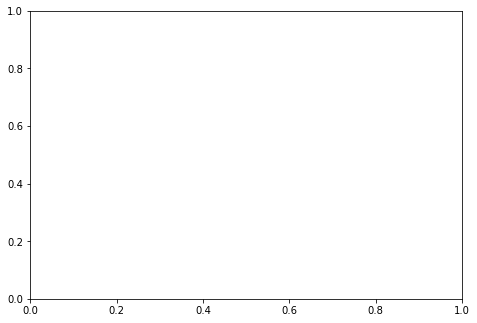

In [34]:
# d = word_size_dict
pos = nx.spring_layout(G, iterations=200, k=0.2, scale=0.5) # position of nodes
nx.draw(G, pos, nodelist=mapping.keys(), node_size=[v*5 for v in mapping.values()], node_color=colors,        
       width=.5, alpha=0.8,
       with_labels=True, font_size=24)

In [26]:
from itertools import count    

types = ['topic','word']
mapping = {'topic':0, 'word':1}
nodes = G.nodes()
colors = [mapping[G.nodes[n]['type']] for n in nodes]

In [25]:
mapping

{'topic': 0, 'word': 1}

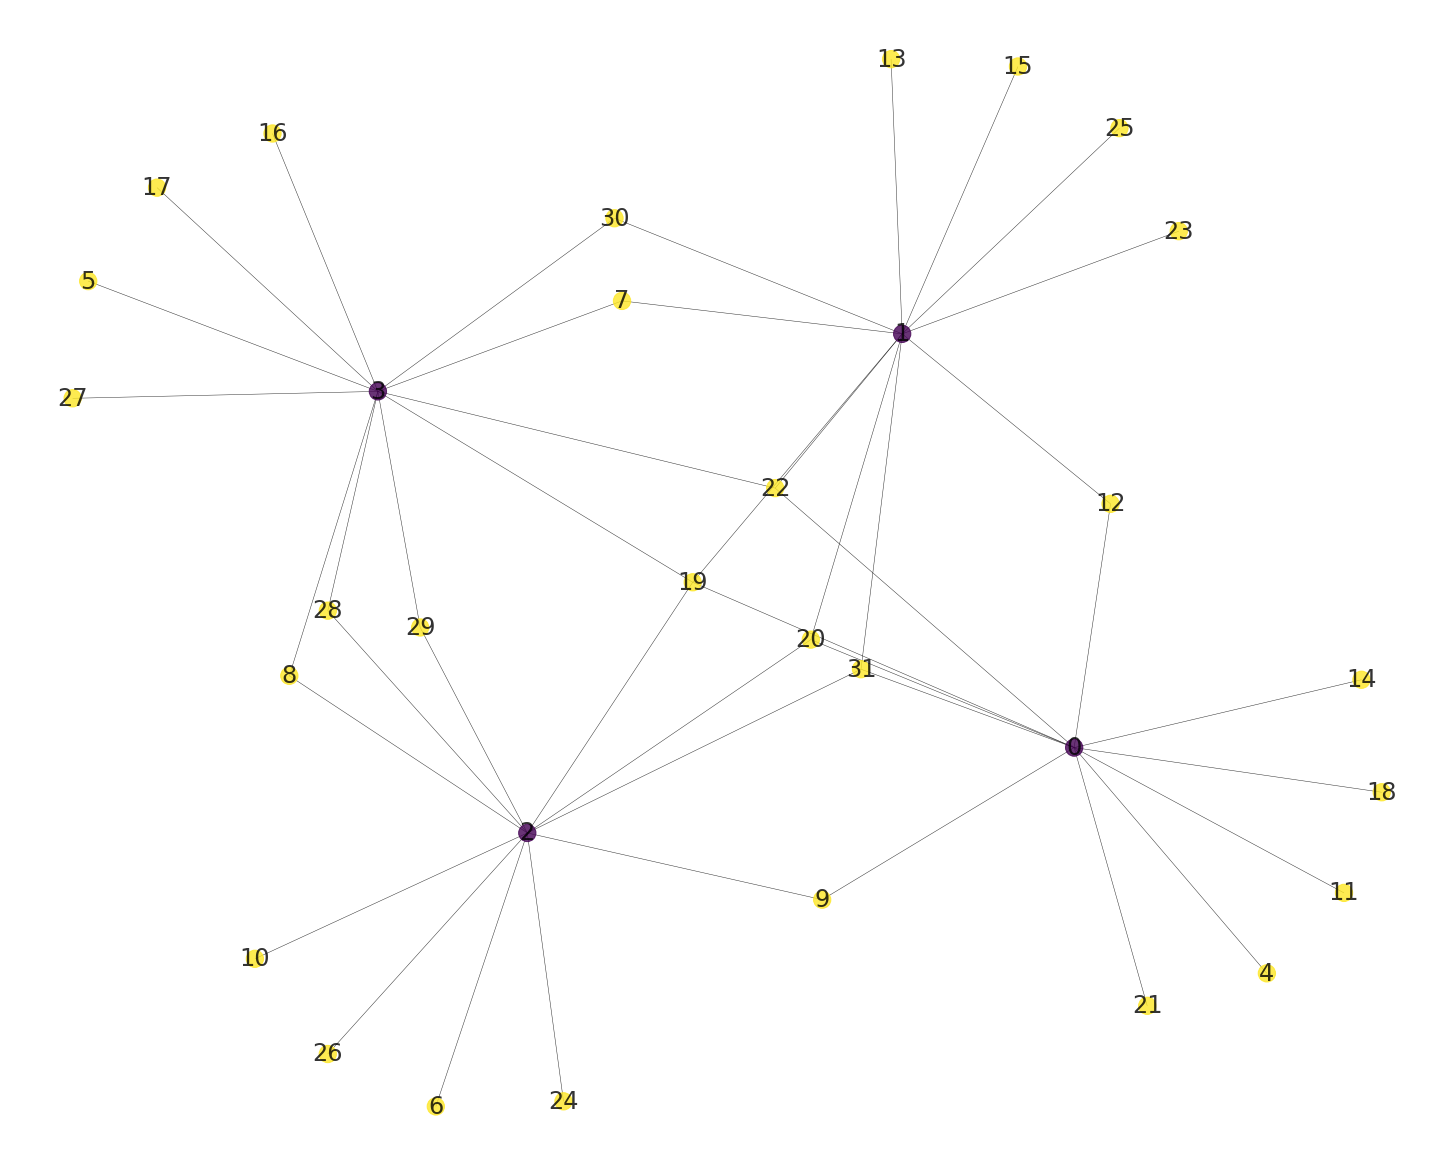

In [37]:
plt.rcParams['figure.figsize'] = [20, 16]

pos = nx.spring_layout(G, iterations=200, k=0.2, scale=0.5) # position of nodes

d = {'topic': 0, 'word': 1}
nx.draw(G, pos, node_color=colors,        
       width=.5, alpha=0.8,
       with_labels=True, font_size=24)

In [38]:
G=nx.from_numpy_matrix(df)
nx.draw(G)

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [40]:
df

Topic #01  Topic #02  Topic #03  Topic #04  advice  career  \
Topic #01           0          0          0          0       2       0   
Topic #02           0          0          0          0       0       0   
Topic #03           0          0          0          0       0       0   
Topic #04           0          0          0          0       0       2   
advice              0          0          0          0       0       0   
career              0          0          0          0       0       0   
company             0          0          0          0       0       0   
country             0          0          0          0       0       0   
course              0          0          0          0       0       0   
dream               0          0          0          0       0       0   
education           0          0          0          0       0       0   
family              0          0          0          0       0       0   
friends             0          0          0          0       0       0   
generation          0          0          0          0       0       0   
home                0          0          0          0       0       0   
idea                0          0          0          0       0       0   
man                 0          0          0          0       0       0   
men                 0          0          0          0       0       0   
moment              0          0          0          0       0       0   
nan                 0          0          0          0       0       0   
parent              0          0          0          0       0       0   
person              0          0          0          0       0       0   
place               0          0          0          0       0       0   
president           0          0          0          0       0       0   
question            0          0          0          0       0       0   
sense               0          0          0          0       0       0   
state               0          0          0          0       0       0   
success             0          0          0          0       0       0   
university          0          0          0          0       0       0   
women               0          0          0          0       0       0   
word                0          0          0          0       0       0   
year                0          0          0          0       0       0   

            company  country  course  dream  ...  place  president  question  \
Topic #01         0        0       0      2  ...      2          0         0   
Topic #02         0        2       0      0  ...      2          2         0   
Topic #03         2        0       2      2  ...      0          0         2   
Topic #04         0        2       2      0  ...      2          0         0   
advice            0        0       0      0  ...      0          0         0   
career            0        0       0      0  ...      0          0         0   
company           0        0       0      0  ...      0          0         0   
country           0        0       0      0  ...      0          0         0   
course            0        0       0      0  ...      0          0         0   
dream             0        0       0      0  ...      0          0         0   
education         0        0       0      0  ...      0          0         0   
family            0        0       0      0  ...      0          0         0   
friends           0        0       0      0  ...      0          0         0   
generation        0        0       0      0  ...      0          0         0   
home              0        0       0      0  ...      0          0         0   
idea              0        0       0      0  ...      0          0         0   
man               0        0       0      0  ...      0          0         0   
men               0        0       0      0  ...      0          0         0   
moment            0        0       0      0  ... 

In [ ]:
G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=df.ID.tolist())